In [190]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 25

In [148]:
# cargamos el dataframe

df = pd.read_csv('datos/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [149]:
df_corr = df.corr()

In [150]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

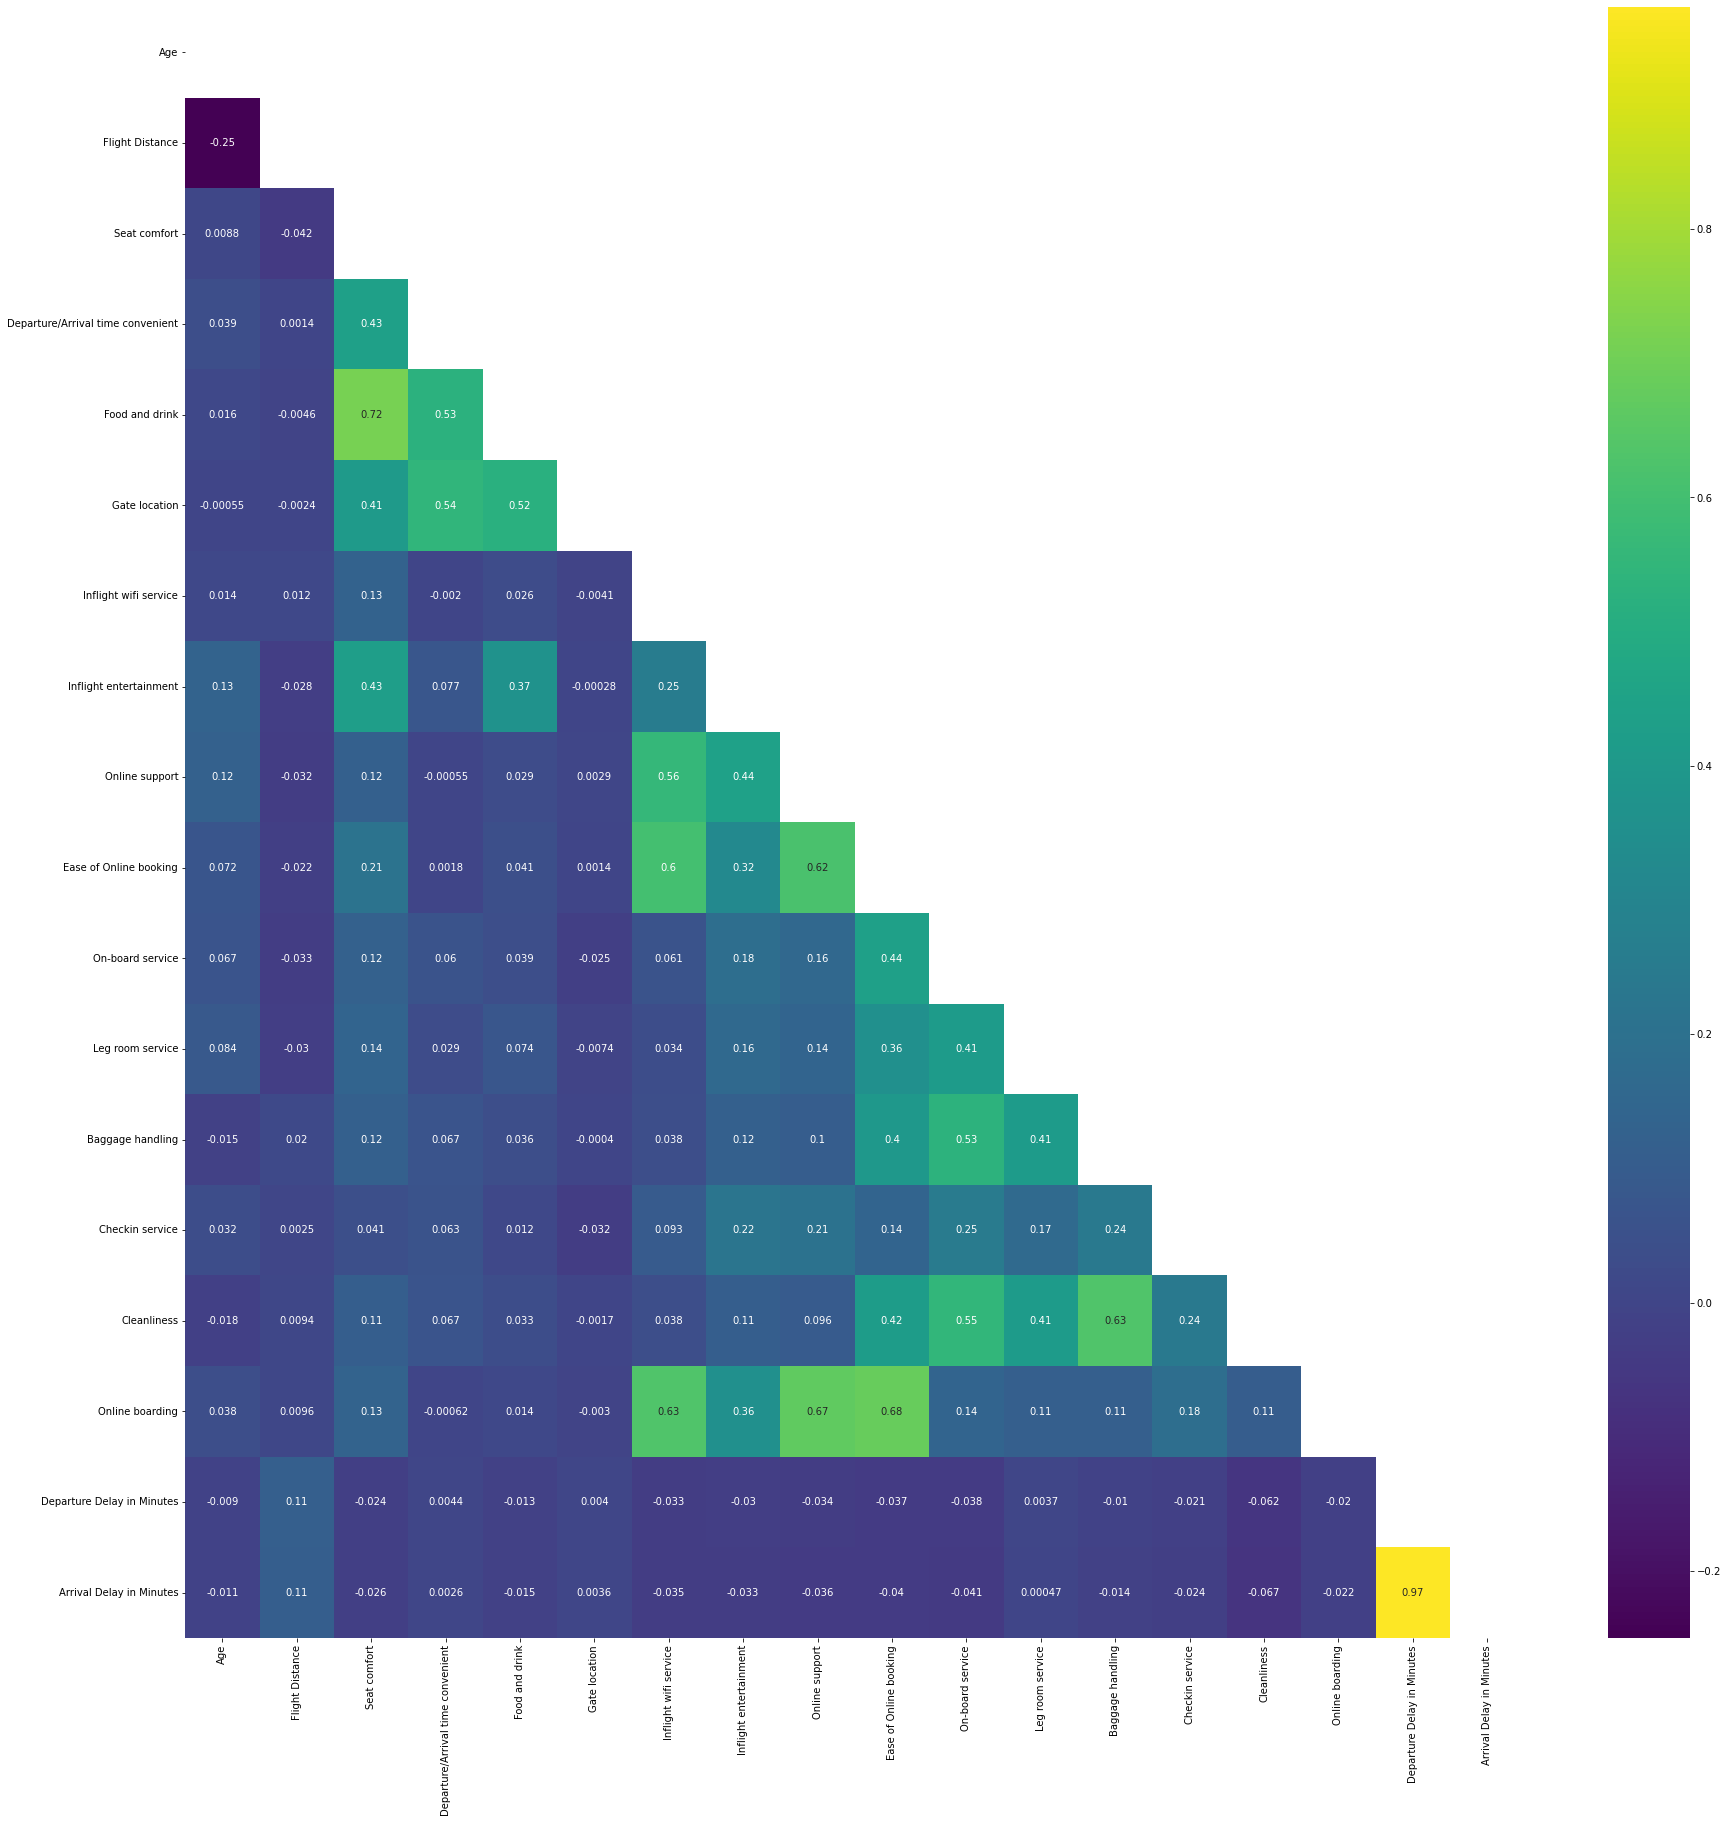

In [151]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="viridis")

plt.show();

In [152]:
# examinamos el número de filas y columnas

df.shape

(129880, 23)

In [153]:
df.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [154]:
df.drop("Arrival Delay in Minutes", axis =1, inplace=True)

In [155]:
# chequeamos si tenemos nulos

df.stb.missing()

,missing,total,percent
satisfaction,0,129880,0.0
Gender,0,129880,0.0
Online boarding,0,129880,0.0
Cleanliness,0,129880,0.0
Checkin service,0,129880,0.0
Baggage handling,0,129880,0.0
Leg room service,0,129880,0.0
On-board service,0,129880,0.0
Ease of Online booking,0,129880,0.0
Online support,0,129880,0.0


In [156]:
# chequeamos si tenemos duplicados

df.duplicated().sum()

0

In [157]:
# comprobamos que se han eliminado el numero correcto de filas

df.shape

(129880, 22)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

In [159]:
# examinamos los principales estadisticos del dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [160]:
# examinamos los principales estadisticos de las columnas categoricas del dataframe

df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


## Estandarización

Cambiamos el tipo a las variables categóricas

In [161]:
columnas_categoria = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service',
 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [162]:
# creamos un dataframe de las variables numéricas

df_num = df.select_dtypes(include=np.number)
df_num.head(2)

,Age,Flight Distance,Departure Delay in Minutes
0,65,265,0
1,47,2464,310


In [163]:
# estandarizamos los datos usando el StandardScaler de la libreria de Sklearn
scaler = StandardScaler()
scaler.fit(df_num)
datos_estandarizados = scaler.transform(df_num)
df_datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = df_num.columns)

In [164]:
df_datos_estandarizados.head(10)

,Age,Flight Distance,Departure Delay in Minutes
0,1.691351,-1.671103,-0.386481
1,0.500820,0.469852,7.756204
2,-1.615680,0.152458,-0.386481
3,1.360648,-1.322552,-0.386481
4,2.022054,-1.584452,-0.386481
5,-0.623571,-0.085102,-0.386481
6,1.757491,-1.708100,0.060053
7,-1.946383,-0.164937,-0.386481
8,1.096085,-1.858035,-0.386481
9,-1.152696,-0.414180,0.401521


In [165]:
df.drop(columns=df_datos_estandarizados.columns, inplace=True)

In [166]:
# lo unimos al dataframe original 

df = pd.concat([df, df_datos_estandarizados], axis = 1, join='inner')

# chequeamos que esta todo bien
df.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691351,-1.671103,-0.386481
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500820,0.469852,7.756204
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615680,0.152458,-0.386481
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,1.360648,-1.322552,-0.386481
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022054,-1.584452,-0.386481


# Encoding

In [167]:
# examinamos la mediana de las variables numericas por satisfaccion

df.groupby("satisfaction").median()

,Age,Flight Distance,Departure Delay in Minutes
satisfaction,,,
dissatisfied,-0.226727,-0.025712,-0.386481
satisfied,0.170117,-0.092891,-0.386481


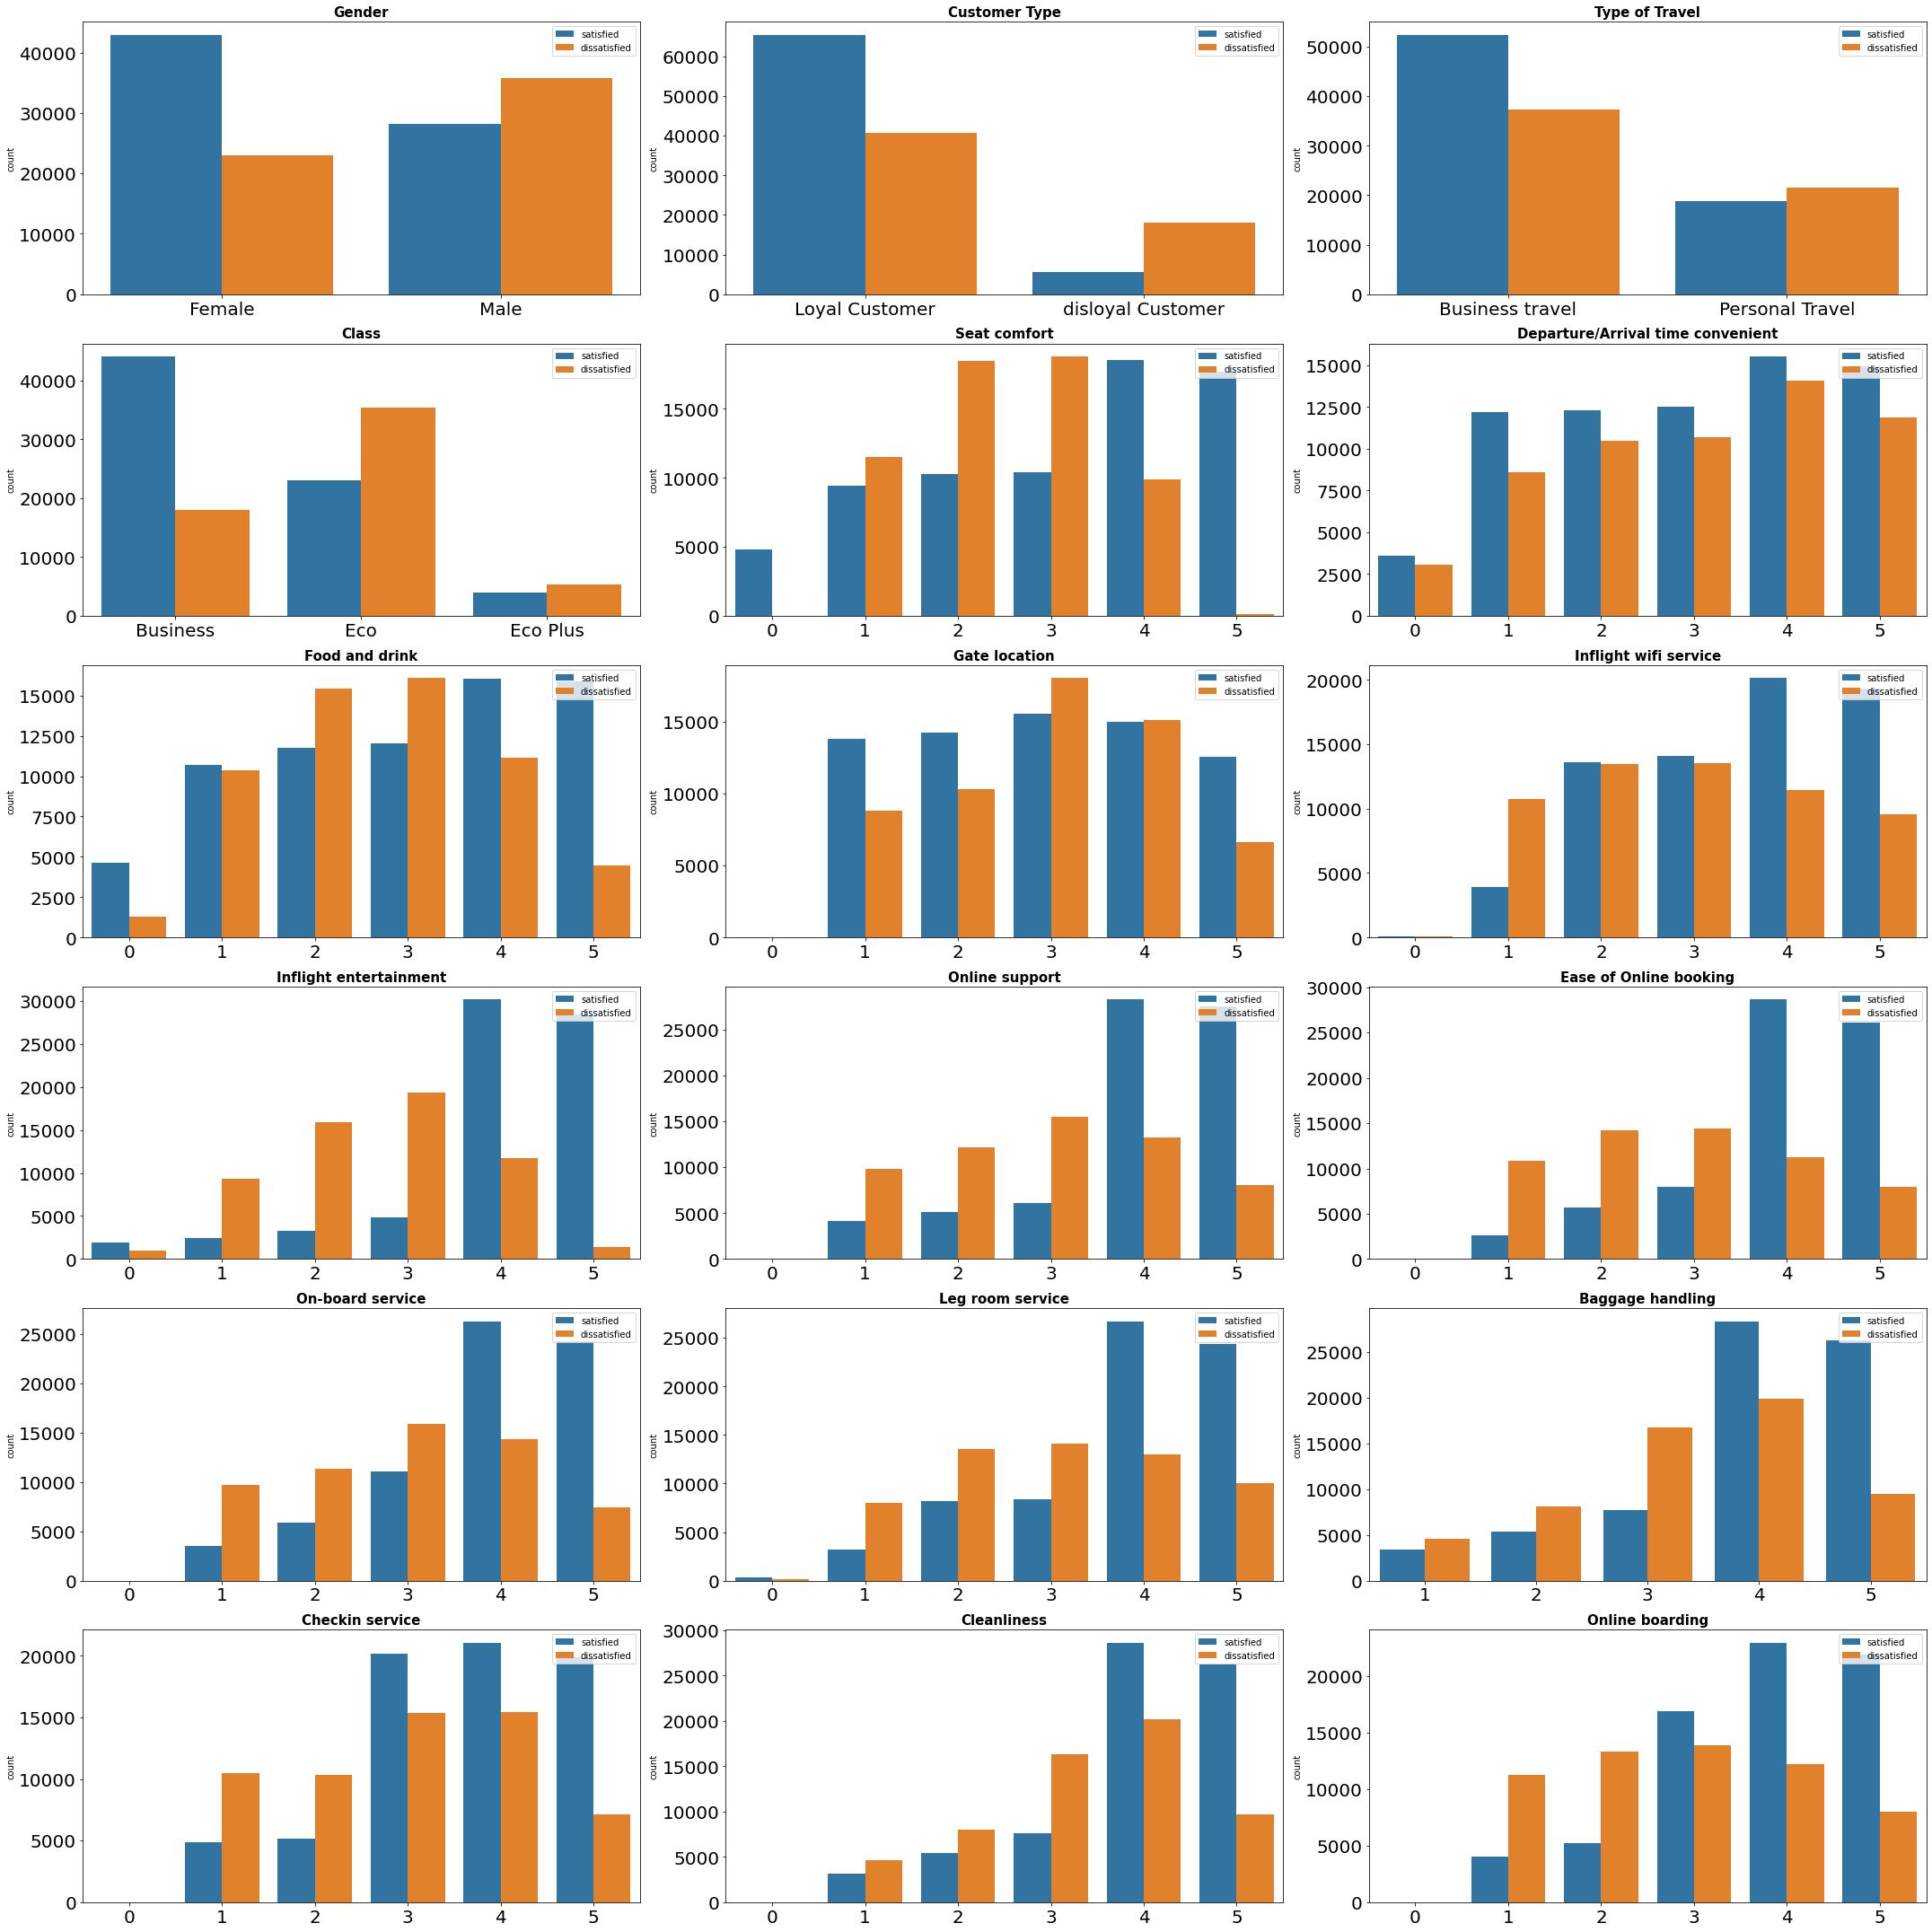

In [168]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

axes = axes.flat

df_countplot = df.drop(['Departure Delay in Minutes', 'Age', 'Flight Distance', 'satisfaction'], axis=1)

for i, colum in enumerate(df_countplot.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

En nuestro caso, nos interesa conocer qué hace que los clientes no estén satisfechos, para así poder modificar estos factores y aumentar la satisfacción general. Intentaremos que esto se refleje en nuestro encoding.

In [169]:
columnas_categoria

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

In [170]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 0, 'dissatisfied': 1})
df['satisfaction'].unique()

array([0, 1])

In [171]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [184]:
def encoding(dataframe_categorica):
    
    dicc_encoding = {}

    for col in dataframe_categorica.columns:
        
        df_group = df.groupby([col,'satisfaction']).count()
        df_group = round(df_group.div(df_group.sum(level=0), level=0)["Age"] * 100, 2)
        df_group = pd.DataFrame(df_group)
        df_group.columns = ['% dissatisfied']
        df_group.reset_index(inplace=True)
        
        df_group = df_group[df_group['satisfaction'] == 1].sort_values(by='% dissatisfied', ascending=True)
        
        if df_group.iloc[0,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[0,2], 3)
        elif df_group.iloc[1,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[1,2], 3)  
        elif df_group.iloc[2,2] > 5:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[2,2], 3)
        else:
            df_group['encoding'] = round(df_group['% dissatisfied']/df_group.iloc[3,2], 3)

        dicc_encoding[col] = dict(zip(df_group[col].unique(), df_group['encoding'].unique()))
        
    return dicc_encoding

In [185]:
diccionario_encoding = encoding(df_cat)
diccionario_encoding

{'Gender': {'Female': 1.0, 'Male': 1.606},
 'Customer Type': {'Loyal Customer': 1.0, 'disloyal Customer': 1.981},
 'Type of Travel': {'Business travel': 1.0, 'Personal Travel': 1.282},
 'Class': {'Business': 1.0, 'Eco Plus': 1.971, 'Eco': 2.085},
 'Seat comfort': {0: 0.006, 5: 0.023, 4: 1.0, 1: 1.577, 2: 1.844, 3: 1.849},
 'Departure/Arrival time convenient': {1: 1.0,
  5: 1.072,
  0: 1.107,
  2: 1.112,
  3: 1.113,
  4: 1.149},
 'Food and drink': {5: 1.0, 0: 1.004, 4: 1.864, 1: 2.237, 2: 2.582, 3: 2.6},
 'Gate location': {0: 0.0, 5: 1.0, 1: 1.13, 2: 1.219, 4: 1.458, 3: 1.559},
 'Inflight wifi service': {5: 1.0,
  4: 1.094,
  3: 1.482,
  2: 1.505,
  0: 1.672,
  1: 2.212},
 'Inflight entertainment': {5: 0.171,
  4: 1.0,
  0: 1.213,
  1: 2.819,
  3: 2.86,
  2: 2.961},
 'Online support': {5: 1.0, 4: 1.409, 2: 3.101, 1: 3.108, 3: 3.162, 0: 4.409},
 'Ease of Online booking': {5: 1.0,
  4: 1.205,
  3: 2.739,
  2: 3.042,
  1: 3.44,
  0: 4.263},
 'On-board service': {5: 1.0,
  4: 1.506,
  3: 2.

- Podemos ver que para la variable de 'Departure/Arrival time convenient' apenas hay diferencia entre el % de clientes insatisfechos por categoría, así vamos a considerarlo como variable categórica nominal.

In [186]:
diccionario_encoding.pop('Departure/Arrival time convenient')

{1: 1.0, 5: 1.072, 0: 1.107, 2: 1.112, 3: 1.113, 4: 1.149}

In [187]:
df_encod = df.copy()

In [188]:
for k, v in dicc_encoding.items():
    df_encod[k] = df_encod[k].map(v)

In [189]:
df_encod.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes
0,0,1.000,1.0,1.282,2.085,0.006,1.107,1.004,1.219,1.505,1.000,3.101,2.739,2.515,1.059,2.590,1.000,2.540,2.680,1.691351,-1.671103,-0.386481
1,0,1.606,1.0,1.282,1.000,0.006,1.107,1.004,1.559,1.672,2.961,3.101,2.739,1.506,1.123,1.557,2.527,2.540,2.680,0.500820,0.469852,7.756204
2,0,1.000,1.0,1.282,2.085,0.006,1.107,1.004,1.559,1.505,1.213,3.101,3.042,2.515,2.156,1.557,1.601,1.539,2.680,-1.615680,0.152458,-0.386481
3,0,1.000,1.0,1.282,2.085,0.006,1.107,1.004,1.559,1.482,1.000,3.162,3.440,3.131,1.059,2.183,1.601,2.222,1.679,1.360648,-1.322552,-0.386481
4,0,1.000,1.0,1.282,2.085,0.006,1.107,1.004,1.559,1.094,2.860,1.409,3.042,2.813,1.059,2.286,1.601,2.218,1.000,2.022054,-1.584452,-0.386481


In [177]:
# comprobamos que haya funcionado bien con los value counts del dataframe original y el dataframe codificado

for col in df_cat.columns:
    print(f'Value counts original de {col}')
    print(df[col].value_counts())
    print('------------')
    print(f'Value counts encoding de {col}')
    print(df_encod[col].value_counts())
    print('------------')
    print('------------')

Value counts original de Gender
Female    65899
Male      63981
Name: Gender, dtype: int64
------------
Value counts encoding de Gender
1.0      65899
1.606    63981
Name: Gender, dtype: int64
------------
------------
Value counts original de Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
------------
Value counts encoding de Customer Type
1.0      106100
1.981     23780
Name: Customer Type, dtype: int64
------------
------------
Value counts original de Type of Travel
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
------------
Value counts encoding de Type of Travel
1.0      89693
1.282    40187
Name: Type of Travel, dtype: int64
------------
------------
Value counts original de Class
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
------------
Value counts encoding de Class
1.0      62160
2.085    58309
1.971     9411
Name: Class, dtype: int64
------------


### Encoding del variable categórica nominal

In [191]:
oh = OneHotEncoder()

In [202]:
df_transformados = oh.fit_transform(df[['Departure/Arrival time convenient']])

In [203]:
oh_df = pd.DataFrame(df_transformados.toarray())
oh_df.columns = oh.get_feature_names_out()

In [204]:
df_final = pd.concat([df_encod, oh_df], axis=1)

In [205]:
df_final.drop('Departure/Arrival time convenient', axis=1, inplace=True)

In [206]:
df_final.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5
0,0,1.000,1.0,1.282,2.085,0.006,1.004,1.219,1.505,1.000,3.101,2.739,2.515,1.059,2.590,1.000,2.54,2.68,1.691351,-1.671103,-0.386481,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.606,1.0,1.282,1.000,0.006,1.004,1.559,1.672,2.961,3.101,2.739,1.506,1.123,1.557,2.527,2.54,2.68,0.500820,0.469852,7.756204,1.0,0.0,0.0,0.0,0.0,0.0


In [207]:
df_final.to_pickle('datos/Invistico_Airline_v4_enco.pkl')